In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/poorna/anaconda3/envs/py35dlcv/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [30]:
numSamples = 20
noiseRange = 7
varMinVal = 0
varMaxVal = 100
numIter = 100

In [31]:
x = np.linspace(varMinVal, varMaxVal, numSamples) + np.random.normal(-1*noiseRange, noiseRange, numSamples)

In [32]:
y = np.linspace(varMinVal, varMaxVal, numSamples) + np.random.normal(-1*noiseRange, noiseRange, numSamples)

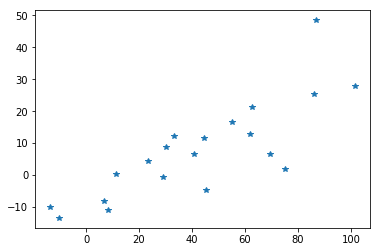

In [33]:
plt.plot(x,y,'*')

In [34]:
m = tf.Variable(np.random.randn(1))
c = tf.Variable(np.random.randn(1))

In [35]:
X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)

In [36]:
y_pred = m*X + c

In [37]:
err = tf.square(y_pred-Y)/(2*len(x))

In [38]:
opz = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = opz.minimize(err)

In [39]:
varInit = tf.global_variables_initializer()

In [40]:
with tf.Session() as sess:
    sess.run(varInit)
    for iter in range(numIter):
        for xpt,ypt in zip(x,y):
            sess.run(train, feed_dict={X:xpt, Y:ypt})
        
    m_final, c_final = sess.run([m,c])

In [41]:
print(m_final, c_final)

[0.3017048] [0.64719911]


In [42]:
xplt = np.linspace(varMinVal-15, varMaxVal+15, numSamples)
yplt = xplt*m_final + c_final

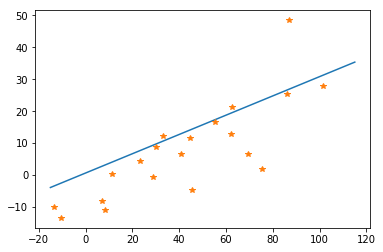

In [43]:
plt.plot(xplt, yplt)
plt.plot(x,y,'*')